<a href="https://colab.research.google.com/github/licciard/lu-phys3466/blob/main/fourier_series_1_sawtooth_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this exercise we will look at the series representation for the sawtooth function and discuss the Gibbs-Wilbraham effect.**


We consider the periodic extension of the function:
$$f(x) = \begin{cases}
-1, & -\pi < x < 0 \\
+1, & 0 < x < \pi
\end{cases}$$ as discussed in class.

In [ ]:
# Python modules used in this notebook
import numpy as np
import matplotlib.pyplot as plt
import sympy  # for symbolic math and arbitrary precision calculations 

Let's draw a plot of $f(x)$. For numerical calculations, we first need to define the values of $x$ for which we will calculate the function. 

**Activity 1. Define an interval for $x$ and the number of points you want to calculate.** *(I suggest you start with about 100 points and increase as needed.)*

In [ ]:
xmin = -10 # ADD a minimum value for x
xmax = 10 # ADD a maximum value for x
npoints = 10000

x = np.linspace(xmin, xmax, npoints)

**Activity 2. Run the code below to see a plot of $f(x)$. Note that it is not periodic. Uncomment out the lines in the function to obtain the periodic function and understand why the additional lines are needed.**

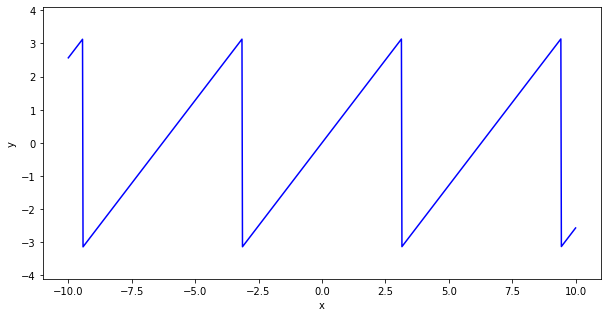

In [ ]:
def f(xi):
  xp = (xi+np.pi)//(2*np.pi) #<-- uncomment out after you run this code once
  return xi - xp*2*np.pi #<-- uncomment out after you run this code once
  return xi

plt.figure(figsize=(10,5))
plt.plot(x,f(x),c='b')
plt.xlabel('x'); plt.ylabel('y');
plt.ylim([-4.1,4.1])
plt.show()


**Activity 3. Write the Fourier coefficients $a_n$ and $b_n$ found in class.**

In [ ]:
def fourier(xi,Nmax = 5):
  a_0 = 0
  tot = a_0/2
  for n in range(1,Nmax+1):
    a_n = 0
    b_n = -2/n * (-1)**n
    tot += a_n * np.cos(n*xi) + b_n * np.sin(n*xi)
  return tot

**Activity 4. Draw a plot comparing $f(x)$ and its Fourier expansion for $N = 1,3,25$.**

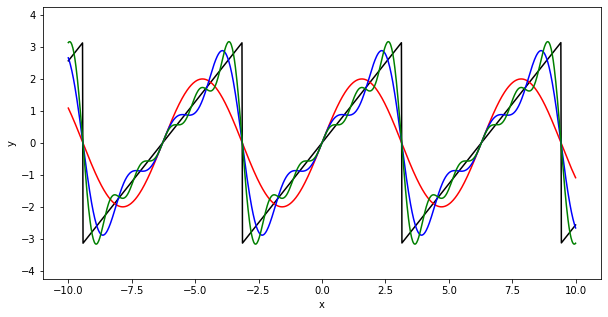

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x,f(x),c='k')
plt.plot(x,fourier(x,1),c='r')
plt.plot(x,fourier(x,3),c='b')
plt.plot(x,fourier(x,5),c='g')
plt.xlabel('x'); plt.ylabel('y');
plt.ylim([-4.25,4.25])
plt.show()

Python provides a very nice module called **sympy** that allows us to solve symbolic math expressions. 

Let's check some of its features regarding Fourier series.

In sympy we need to define our variables using the function "Symbol". To distinguish with our previous variable $x$, here we will call our function argument of $t$. 

**Activity 5. Run the code below to define our symbolic variable $t$ and $f(t)$. Later we will define the range where we want to focus the Fourier series, so we do not need to make it periodic here. In fact, calculations are faster this way.**

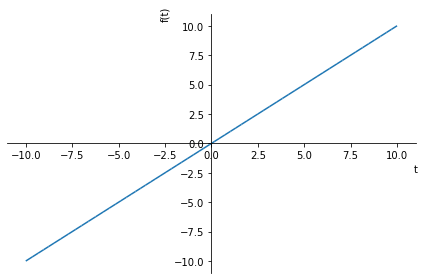

In [ ]:
def linf(t):
    return t 

t = sympy.Symbol('t', real=True)
p1 = sympy.plot(linf(t), (t, -10, 10), show=False)
p1.show()

Fourier series can be expressed using complex numbers as:
$$f(t) = \sum_{n=-\infty}^{\infty} c_n \, e^{i \, n \, t}$$
where the complex coefficients can be calculated in terms of the real coefficients $a_n$ and $b_n$, which can be expressed by:
$$c_n = \int_{-\pi}^{\pi} f(t)\, e^{-i \, n \, t} \, dt$$

**Activity 6. Run the code below for $N=1,2,5$ and others to see sympy resolving the Fourier expansion for $f(t)$ using the formulas above. Compare the analytical expression obtained here with the one resolved in class.**

2⋅sin(t) - sin(2⋅t)


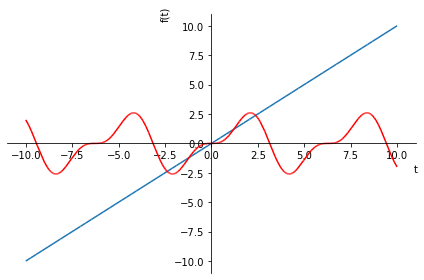

In [ ]:
def c(n):
    return (sympy.integrate(linf(t)*sympy.exp(-sympy.I * n * t),(t, -sympy.pi, sympy.pi))/(2*sympy.pi))

def S(N):
    return sum(c(n)*sympy.exp(sympy.I *n*t) for n in range(-N, N+1)).expand(complex=True).simplify()

N = 2

analytic_approx = S(N).expand()
print(sympy.pretty(analytic_approx))

interval = (t, -10, 10)
p1 = sympy.plot(linf(t), interval, show=False)
p2 = sympy.plot(analytic_approx, interval, show=False)
p2[0].line_color = 'red'
p1.extend(p2)
p1.show()

**Activity 7. Sympy also offers symbolic derivation and root solution of equations. Run the code below to find the derivative of the Fourier series. (Keep it at $N=2$ for simplicity and best visualization.) Then the code finds all the roots of the derivative $f_N^{'}(t) = 0$. What points are these in the above plot?**

In [ ]:
fd = sympy.diff(analytic_approx)
print("derivative: ",fd)
dRoots = sympy.solveset(fd, t)
dRoots

derivative:  2*cos(t) - 2*cos(2*t)


Union(ImageSet(Lambda(_n, 2*_n*pi), Integers), ImageSet(Lambda(_n, 2*_n*pi + 4*pi/3), Integers), ImageSet(Lambda(_n, 2*_n*pi + 2*pi/3), Integers))

If you want to select just a few of the roots, you can use the sympy function called **Intersection**.

In [ ]:
intersection = [analytic_approx.subs(t,_) for _ in sympy.Intersection(dRoots,sympy.Interval(-sympy.pi,sympy.pi))]
intersection

[0, -3*sqrt(3)/2, 3*sqrt(3)/2]

The Gibbs-Wilbraham phenomenon involves both the fact that Fourier sums overshoot at a jump discontinuity, and that this overshoot does not die out as more terms are added to the sum. [Wikipedia]

We can calculate the maximum point of the overshoot in the limit for large $N$ to be $\approx 8.949\%$. In this activity we will calculate the overshoot as a function of $N$ for the sawtooth function resolved above.

**Activity 8. Choose a value for $N_{max}$ to calculate the overshoot differences, and play with the plot limits to see if the difference indeed goes to near $9\%$. If you do not see a nice plot, what do you think is happening? Recall for what values of $x$ you calculate the functions and tune it to become more precise.**

In [ ]:
Nmax = 150

ns = np.arange(1,200)
diff = []
for n in ns:
  yf  = fourier(x,n)
  diff.append((max(yf)-np.pi)*100/(2*np.pi))

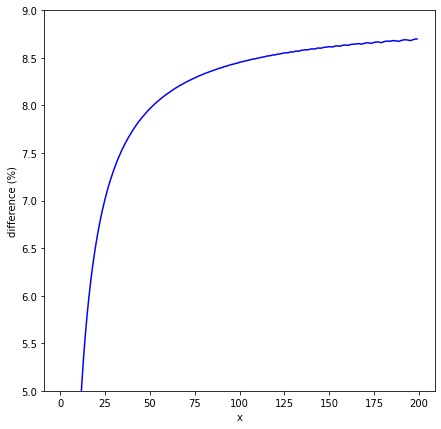

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(ns,diff,c='b')
plt.xlabel('x'); plt.ylabel('difference (%)');
plt.ylim([5,9])
plt.show()

**Activity 9 - Challenge: Obtain the plot above using the sympy symbolic approach to find the maximum point of the Fourier expansion. (This method is exact but takes a lot longer than the numerical approach proposed above.)**

In [ ]:
# Challenge!